1. Deklaracja klasy 'matrix', która obsługuje mnożenie i potęgowanie macierzy

In [30]:


class matrix:
    def __init__(self, vals = [[1, 0], [0, 1]]):
        self.mac = vals

    def __mul__(self, oth):
        if( len ( self.mac[0] ) != len(oth.mac)):
            raise AttributeError('Width of the first matrix MUST match the height of the second matrix')
        w = len(self.mac) 
        h = len(oth.mac[0])
        gl = len(self.mac[0])
        new = [[0] * w  for i in range(h)]
        for i in range(h):
            for j in range(w):
                for t in range(gl):
                    new[i][j] += self.mac[i][t] * oth.mac[t][j]
                #print(new[i][j])
        return matrix(new)
    
    #Potęgowanie za pomocą szybkiego potęgowania macierzy
    
    def __pow__(self, exp):

        res = matrix()  
        c_base = matrix(self.mac)

        it_bit = 1
        while(it_bit <= exp):
            if(it_bit & exp):
                res *= c_base
            c_base *= c_base
            it_bit <<= 1
        
        return res
        


a = matrix([[1, 2], [2, 1]])

print( (a**2).mac )
print( (a**3).mac)




    

[[5, 4], [4, 5]]
[[13, 14], [14, 13]]


2. Test dla prostej funkcji z dx/dt = kx 

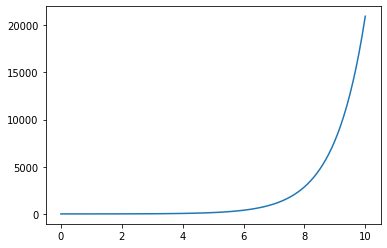

In [41]:
from matplotlib import pyplot as plt
# x(t) = x(t-1) + ( k * x(t-1) ) * dt
def gen_fun1(k, dt):
    return matrix([
        [k*dt, k*dt],
        [1   , 1] ])

x0 = 1

m_dt = 0.01
r_dt = 0.1
t_max = 10

t = [0]
x = [x0]

x_mac = matrix ( [[x0, x0], [0,0]] )
f1_mac = gen_fun1(1, m_dt)
f1_mac = f1_mac**( int ( r_dt / m_dt ) ) # 1 przeskok jest 10 razy większy. MUSI BYĆ CAŁKOWITE

while ( t[-1] < t_max):
    t.append ( round ( t[-1] + r_dt, 12 ) )
    x_mac *= f1_mac
    x.append ( x_mac.mac[0][0] )

plt.plot(t, x)
plt.show()

2b. Prównanie side-by-side

[[0.1, 0.1], [1.0, 1.0]]
Rozmiar tablicy : 101
[[0.010936852726843607, 0.010936852726843607], [1.0936852726843609, 1.0936852726843609]]
Rozmiar tablicy : 101
[[1.1051593139011934e-05, 1.1051593139011934e-05], [1.1051593139011935, 1.1051593139011935]]
Rozmiar tablicy : 101
[[1.1174198268643102e-15, 1.1174198268643102e-15], [1.117419826864314, 1.117419826864314]]
Rozmiar tablicy : 101
[[1.0000000000000042e-16, 1.0000000000000042e-16], [1.0, 1.0]]
Rozmiar tablicy : 101


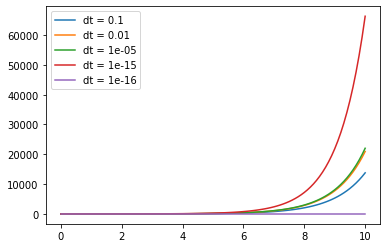

In [58]:

r_dt = 0.1
t_max = 10

legend = []

for m_dt in [0.1, 0.01, 0.00001, 0.000000000000001, 0.0000000000000001]:
    x0 = 1
    
    t = [0]
    x = [x0]

    x_mac = matrix ( [[x0, x0], [0,0]] )
    f1_mac = gen_fun1(1, m_dt)
    f1_mac = f1_mac**( int ( r_dt / m_dt ) ) # 1 przeskok jest 10 razy większy. MUSI BYĆ CAŁKOWITE
    print(f1_mac.mac)
    while ( t[-1] < t_max):
        t.append ( round ( t[-1] + r_dt, 12 ) )
        x_mac *= f1_mac
        x.append ( x_mac.mac[0][0] )

    plt.plot(t, x)
    print( "Rozmiar tablicy :" , len(x) )
    legend.append( "dt = " + str(m_dt) )

plt.legend(legend)

plt.show()

Obserwacja : dx nie może być mniejsze niż 1e-16, bo inaczej python zaokrągla zmiany do 1 (do naprawy)

Konkluzja : Nie udało się osiągnąć zamierzanej dokładności, jednak postęp jest spory - wykres z dokładnością 1e-16 iteracyjnie kalkulowałby się 10^10 sekund lub 321 lat (w pythonie)